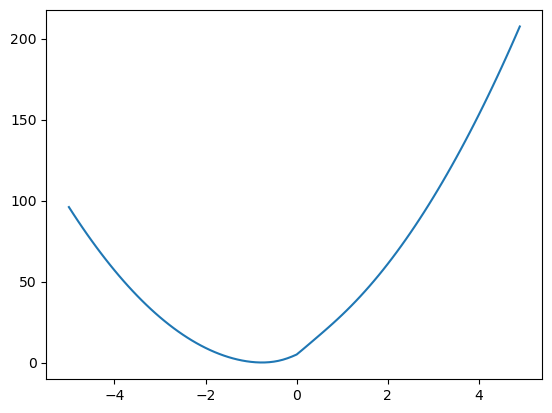

In [211]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

def sigmoid(x):
    function_value = 1/(1+np.exp(-x))
    return function_value

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)


def F(x ,alpha1 , alpha2 , alpha3 , alpha4 , alpha5 , alpha6 , teta1 , teta2 , teta3 ):
    return alpha1*sigmoid(teta1*x) + alpha2*tanh(teta2*x) + alpha3*relu(teta3*x) + alpha4*x**2 + alpha5*x + alpha6

def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

xx = np.arange(-5, 5, 0.1)
yy = []
for i in xx:
    yy.append(F(i , 2 , 3 , 4 , 5 , 6 , 4 , 1.5 , 2 , 2.5 ))
yy = np.array(yy)

xx = xx.reshape((xx.shape[0],1))
yy = yy.reshape((yy.shape[0],1))

data = np.concatenate((xx, yy), axis=1)

df = pd.DataFrame(data)
df.to_csv('data.csv' , index=False)

plt.plot(data[:,0],data[:,1])


In [212]:
X , Y = data[:,0] , data[:,1]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452
 0.05808361 0.86617615 0.60111501]
MSE:  1.7416460558533668


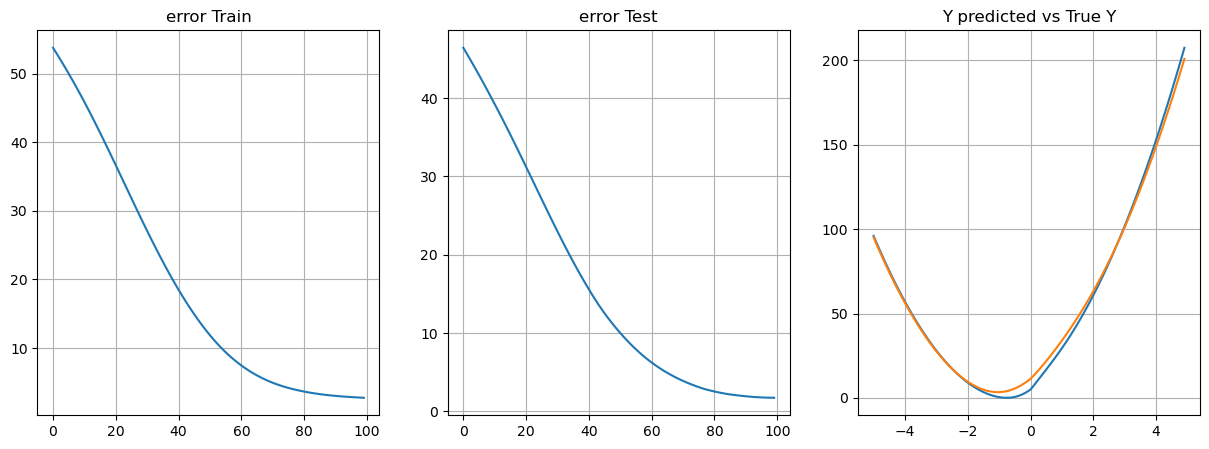

In [213]:
np.random.seed(42)
initial_parameters = np.random.rand(9)
print(initial_parameters)
errors_train = []
errors_test = []
        
    
def update_parameters_alpha():
    eta = 0.000001
    for epoch in range(100):

        error1 = 0
        for i in range(x_train.shape[0]):
            
            erorr = y_train[i] - F(x_train[i] , *initial_parameters)
            initial_parameters[0] -= -1 * eta * erorr  * F(x_train[i], alpha1=1, alpha2=initial_parameters[1], alpha3=initial_parameters[2], alpha4=initial_parameters[3], alpha5=initial_parameters[4], alpha6=initial_parameters[5], teta1=initial_parameters[6], teta2=initial_parameters[7], teta3=initial_parameters[8])
            
            initial_parameters[1] -= -1 * eta * erorr  * F(x_train[i], alpha1=initial_parameters[0], alpha2=1, alpha3=initial_parameters[2], alpha4=initial_parameters[3], alpha5=initial_parameters[4], alpha6=initial_parameters[5], teta1=initial_parameters[6], teta2=initial_parameters[7], teta3=initial_parameters[8])
            
            initial_parameters[2] -= -1 * eta * erorr  * F(x_train[i], alpha1=initial_parameters[0], alpha2=initial_parameters[1] , alpha3=1 , alpha4=initial_parameters[3], alpha5=initial_parameters[4], alpha6=initial_parameters[5], teta1=initial_parameters[6], teta2=initial_parameters[7], teta3=initial_parameters[8])        
    
            initial_parameters[3] -= -1 * eta * erorr * F(x_train[i], alpha1=initial_parameters[0], alpha2=initial_parameters[1] , alpha3=initial_parameters[2] , alpha4=1 , alpha5=initial_parameters[4], alpha6=initial_parameters[5], teta1=initial_parameters[6], teta2=initial_parameters[7], teta3=initial_parameters[8])
            
            initial_parameters[4] -= -1 * eta * erorr * F(x_train[i], alpha1=initial_parameters[0], alpha2=initial_parameters[1] , alpha3=initial_parameters[2] , alpha4=initial_parameters[3] , alpha5=1, alpha6=initial_parameters[5], teta1=initial_parameters[6], teta2=initial_parameters[7], teta3=initial_parameters[8])        
            
            initial_parameters[5] -= -1 * eta * erorr * F(x_train[i], alpha1=initial_parameters[0], alpha2=initial_parameters[1] , alpha3=initial_parameters[2] , alpha4=initial_parameters[3] , alpha5=initial_parameters[4], alpha6=1, teta1=initial_parameters[6], teta2=initial_parameters[7], teta3=initial_parameters[8])
            
            error1 += abs(erorr)
        
        error2 = 0
        for i in range(x_test.shape[0]):
            erorr_test = y_test[i] - F(x_test[i] , *initial_parameters)
            error2 += abs(erorr_test)
        errors_test.append(error2 / x_test.shape[0])
            
        errors_train.append(error1 / x_train.shape[0])
        
update_parameters_alpha()

fig , ax = plt.subplots(1 , 3 , figsize = (15,5))
plt.plot(data[:,0],data[:,1])
y_predicted = F(X,*initial_parameters)


ax[0].plot(errors_train)
ax[0].grid(True)
ax[0].set_title('error Train')

ax[1].plot(errors_test)
ax[1].grid(True)
ax[1].set_title('error Test')

ax[2].plot(data[:,0] , y_predicted)
ax[2].grid(True)
ax[2].set_title('Y predicted vs True Y')

print('MSE: ' , errors_test[-1])

In [214]:
mse(data[:,0] , y_predicted)

6150.67946480395

[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452
 0.05808361 0.86617615 0.60111501]
[4.43889968 5.14759473 4.49159934 2.7429503  4.63794863 4.12899534
 4.08913335 5.07143382 4.3934171 ]
MSE:  14.969046870841316


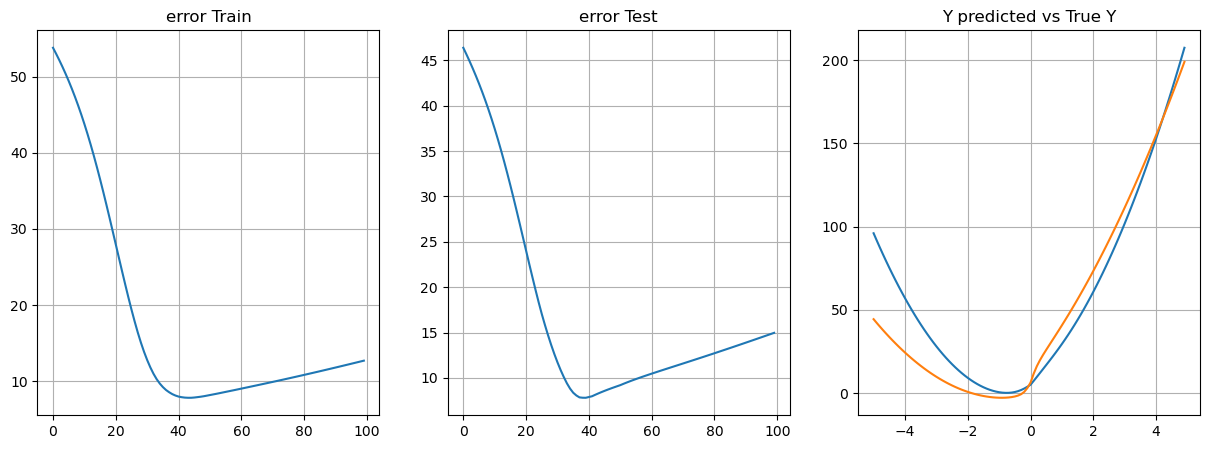

In [169]:
np.random.seed(42)
initial_parameters = np.random.rand(9)
print(initial_parameters)
errors_train = []
errors_test = []

def f_derivation_sig(x ,alpha1 , alpha2 , alpha3 , alpha4 , alpha5 , alpha6 , teta1 , teta2 , teta3):
    return alpha1*x*(1-sigmoid(teta1*x))*sigmoid(teta1*x) + alpha2*tanh(teta2*x) + alpha3*relu(teta3*x) + alpha4*x**2 + alpha5*x + alpha6

def f_derivation_tanh(x ,alpha1 , alpha2 , alpha3 , alpha4 , alpha5 , alpha6 , teta1 , teta2 , teta3):
    return alpha1*sigmoid(teta1*x) + x*alpha2*(1-tanh(teta2*x)**2) + alpha3*relu(teta3*x) + alpha4*x**2 + alpha5*x + alpha6

def f_derivation_relu(x ,alpha1 , alpha2 , alpha3 , alpha4 , alpha5 , alpha6 , teta1 , teta2 , teta3):
    return alpha1*sigmoid(teta1*x) + alpha2*tanh(teta2*x) + x*alpha3*np.where(x > 0 , 1 , 0) + alpha4*x**2 + alpha5*x + alpha6

    

def F(x ,alpha1 , alpha2 , alpha3 , alpha4 , alpha5 , alpha6 , teta1 , teta2 , teta3):
    return alpha1*sigmoid(teta1*x) + alpha2*tanh(teta2*x) + alpha3*relu(teta3*x) + alpha4*x**2 + alpha5*x + alpha6
    
    
def update_parameters_all():
    eta = 0.000001
    for epoch in range(100):

        error1 = 0
        for i in range(x_train.shape[0]):
            
            erorr = y_train[i] - F(x_train[i] , *initial_parameters)
            initial_parameters[0] -= -1 * eta * erorr  * F(x_train[i], alpha1=1, alpha2=initial_parameters[1], alpha3=initial_parameters[2], alpha4=initial_parameters[3], alpha5=initial_parameters[4], alpha6=initial_parameters[5], teta1=initial_parameters[6], teta2=initial_parameters[7], teta3=initial_parameters[8])
            
            initial_parameters[1] -= -1 * eta * erorr  * F(x_train[i], alpha1=initial_parameters[0], alpha2=1, alpha3=initial_parameters[2], alpha4=initial_parameters[3], alpha5=initial_parameters[4], alpha6=initial_parameters[5], teta1=initial_parameters[6], teta2=initial_parameters[7], teta3=initial_parameters[8])
            
            initial_parameters[2] -= -1 * eta * erorr  * F(x_train[i], alpha1=initial_parameters[0], alpha2=initial_parameters[1] , alpha3=1 , alpha4=initial_parameters[3], alpha5=initial_parameters[4], alpha6=initial_parameters[5], teta1=initial_parameters[6], teta2=initial_parameters[7], teta3=initial_parameters[8])        
    
            initial_parameters[3] -= -1 * eta * erorr * F(x_train[i], alpha1=initial_parameters[0], alpha2=initial_parameters[1] , alpha3=initial_parameters[2] , alpha4=1 , alpha5=initial_parameters[4], alpha6=initial_parameters[5], teta1=initial_parameters[6], teta2=initial_parameters[7], teta3=initial_parameters[8])
            
            initial_parameters[4] -= -1 * eta * erorr * F(x_train[i], alpha1=initial_parameters[0], alpha2=initial_parameters[1] , alpha3=initial_parameters[2] , alpha4=initial_parameters[3] , alpha5=1, alpha6=initial_parameters[5], teta1=initial_parameters[6], teta2=initial_parameters[7], teta3=initial_parameters[8])        
            
            initial_parameters[5] -= -1 * eta * erorr * F(x_train[i], alpha1=initial_parameters[0], alpha2=initial_parameters[1] , alpha3=initial_parameters[2] , alpha4=initial_parameters[3] , alpha5=initial_parameters[4], alpha6=1, teta1=initial_parameters[6], teta2=initial_parameters[7], teta3=initial_parameters[8])
            
            initial_parameters[6] -= -1 * eta * erorr * f_derivation_sig(x_train[i] , *initial_parameters)
            
            initial_parameters[7] -= -1 * eta * erorr * f_derivation_tanh(x_train[i] , *initial_parameters)
            
            initial_parameters[8] -= -1 * eta * erorr * f_derivation_relu(x_train[i] , *initial_parameters)
            
            
            
            error1 += abs(erorr)
        
        error2 = 0
        for i in range(x_test.shape[0]):
            erorr_test = y_test[i] - F(x_test[i] , *initial_parameters)
            error2 += abs(erorr_test)
        errors_test.append(error2 / x_test.shape[0])
            
        errors_train.append(error1 / x_train.shape[0])
        
update_parameters_all()
print(initial_parameters)

fig , ax = plt.subplots(1 , 3 , figsize = (15,5))
plt.plot(data[:,0],data[:,1])
y_predicted = F(X,*initial_parameters)


ax[0].plot(errors_train)
ax[0].grid(True)
ax[0].set_title('error Train')

ax[1].plot(errors_test)
ax[1].grid(True)
ax[1].set_title('error Test')

ax[2].plot(data[:,0] , y_predicted)
ax[2].grid(True)
ax[2].set_title('Y predicted vs True Y')

print('MSE: ' , errors_test[-1])

[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452
 0.05808361 0.86617615 0.60111501]
[  0.37454012   0.95071431   0.73199394   0.59865848   0.15601864
   0.15599452 112.32952628 112.8978608   33.95507781]
MSE:  22.508668254323915


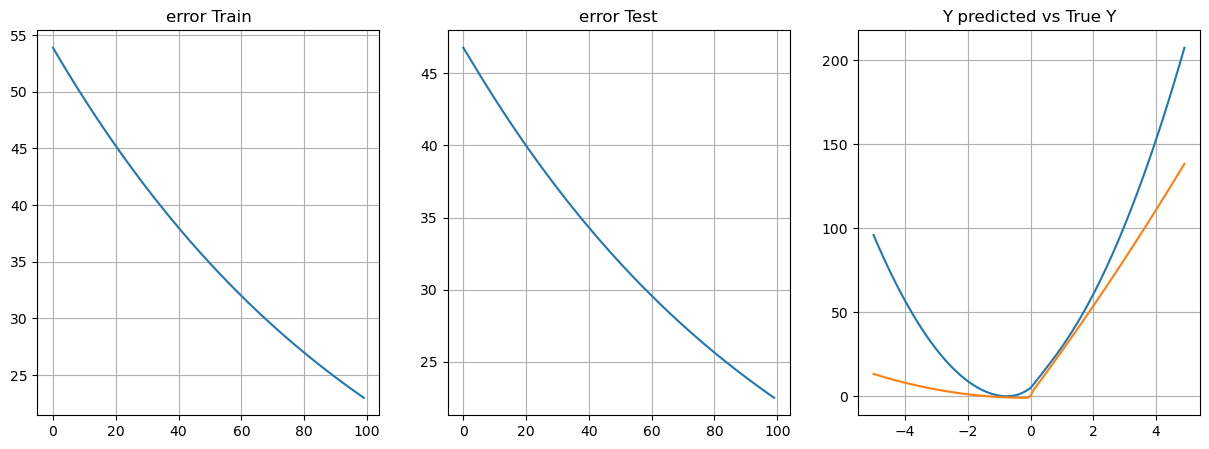

In [168]:
np.random.seed(42)
initial_parameters = np.random.rand(9)
print(initial_parameters)
errors_train = []
errors_test = []

    

def F(x ,alpha1 , alpha2 , alpha3 , alpha4 , alpha5 , alpha6 , teta1 , teta2 , teta3):
    return alpha1*sigmoid(teta1*x) + alpha2*tanh(teta2*x) + alpha3*relu(teta3*x) + alpha4*x**2 + alpha5*x + alpha6
    
    
def update_parameters_teta():
    eta = 0.00001
    for epoch in range(100):

        error1 = 0
        for i in range(x_train.shape[0]):
            
            erorr = y_train[i] - F(x_train[i] , *initial_parameters)
            
            initial_parameters[6] -= -1 * eta * erorr * f_derivation_sig(x_train[i] , *initial_parameters)
            
            initial_parameters[7] -= -1 * eta * erorr * f_derivation_tanh(x_train[i] , *initial_parameters)
            
            initial_parameters[8] -= -1 * eta * erorr * f_derivation_relu(x_train[i] , *initial_parameters)
            
            
            
            error1 += abs(erorr)
        
        error2 = 0
        for i in range(x_test.shape[0]):
            erorr_test = y_test[i] - F(x_test[i] , *initial_parameters)
            error2 += abs(erorr_test)
        errors_test.append(error2 / x_test.shape[0])
            
        errors_train.append(error1 / x_train.shape[0])
        
update_parameters_teta()
print(initial_parameters)

fig , ax = plt.subplots(1 , 3 , figsize = (15,5))
plt.plot(data[:,0],data[:,1])
y_predicted = F(X,*initial_parameters)


ax[0].plot(errors_train)
ax[0].grid(True)
ax[0].set_title('error Train')

ax[1].plot(errors_test)
ax[1].grid(True)
ax[1].set_title('error Test')

ax[2].plot(data[:,0] , y_predicted)
ax[2].grid(True)
ax[2].set_title('Y predicted vs True Y')

print('MSE: ' , errors_test[-1])

In [197]:
def F(x, alpha1, alpha2, alpha3, alpha4, alpha5, alpha6, teta1, teta2, teta3):
    return (alpha1 * sigmoid(teta1 * x) +
            alpha2 * np.tanh(teta2 * x) +
            alpha3 * relu(teta3 * x) +
            alpha4 * x**2 +
            alpha5 * x +
            alpha6)


# پارامترهای اولیه
alpha = np.random.randn(6)  # مقادیر اولیه آلفا
teta = np.array([1.5, 2, 2.5])  # مقادیر تتا
learning_rate = 0.01
momentum = 0.9
v = np.zeros_like(alpha)

errors_train = []


# گرادیان نزولی همراه با Momentum
for epoch in range(100):  # ۱۰۰۰ اپوک برای آموزش
    y_pred_train = F(x_train, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], teta[0], teta[1], teta[2])
    error = mse(y_train, y_pred_train)
    
    # محاسبه گرادیان نسبت به پارامترهای آلفا
    grad_alpha = np.zeros_like(alpha)
    for i in range(len(alpha)):
        delta = np.zeros_like(alpha)
        delta[i] = 1e-5
        y_pred_delta = F(x_train, *(alpha + delta), teta[0], teta[1], teta[2])
        grad_alpha[i] = (mse(y_train, y_pred_delta) - error) / delta[i]
    
    # به‌روزرسانی پارامترهای آلفا با استفاده از Momentum
    v = momentum * v - learning_rate * grad_alpha
    alpha += v
    
    # نمایش خطا در هر اپوک
    errors_train.append(error)
    print(f'Epoch {epoch}, MSE: {error}')
        
        

# محاسبه MSE نهایی روی داده‌های آزمون
y_pred_test = F(x_test, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], teta[0], teta[1], teta[2])
final_mse = mse(y_test, y_pred_test)
print(f'Final MSE on test set: {final_mse}')


Epoch 0, MSE: 6794.647843731244
Epoch 1, MSE: 21385.6764519868
Epoch 2, MSE: 4683.586504766516
Epoch 3, MSE: 4521.385138789477
Epoch 4, MSE: 15871.882311510542
Epoch 5, MSE: 3874.3698729721773
Epoch 6, MSE: 3062.779958853798
Epoch 7, MSE: 11273.880958132208
Epoch 8, MSE: 2900.5606091421387
Epoch 9, MSE: 2365.6435656346594
Epoch 10, MSE: 8329.727015557914
Epoch 11, MSE: 2056.4895834584504
Epoch 12, MSE: 1510.3565184960066
Epoch 13, MSE: 6121.675311528416
Epoch 14, MSE: 1698.6874746242004
Epoch 15, MSE: 1064.7816180174716
Epoch 16, MSE: 4348.95323996571
Epoch 17, MSE: 1229.4922929988195
Epoch 18, MSE: 809.782256276792
Epoch 19, MSE: 3235.3068756219423
Epoch 20, MSE: 900.6183979910986
Epoch 21, MSE: 498.88722978100543
Epoch 22, MSE: 2351.021697649354
Epoch 23, MSE: 732.918426114484
Epoch 24, MSE: 369.9821670932063
Epoch 25, MSE: 1677.3951785008353
Epoch 26, MSE: 519.337696579373
Epoch 27, MSE: 271.4843312016001
Epoch 28, MSE: 1252.0192298236682
Epoch 29, MSE: 392.4079461045166
Epoch 30, M

In [193]:
# پارامترهای اولیه
alpha = np.random.randn(6)  # مقادیر اولیه آلفا
teta = np.random.randn(3)   # مقادیر اولیه تتا
learning_rate = 0.001
momentum = 0.9

# متغیرهای مومنتوم برای آلفا و تتا
v_alpha = np.zeros_like(alpha)
v_teta = np.zeros_like(teta)

# تابع خطا (MSE)
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

# گرادیان نزولی همراه با مومنتوم برای آلفا و تتا
for epoch in range(1000):  # ۱۰۰۰ اپوک برای آموزش
    y_pred_train = F(x_train, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], teta[0], teta[1], teta[2])
    error = mse(y_train, y_pred_train)
    
    # محاسبه گرادیان نسبت به پارامترهای آلفا
    grad_alpha = np.zeros_like(alpha)
    for i in range(len(alpha)):
        delta = np.zeros_like(alpha)
        delta[i] = 1e-5
        y_pred_delta = F(x_train, *(alpha + delta), teta[0], teta[1], teta[2])
        grad_alpha[i] = (mse(y_train, y_pred_delta) - error) / delta[i]
    
    # محاسبه گرادیان نسبت به پارامترهای تتا
    grad_teta = np.zeros_like(teta)
    for i in range(len(teta)):
        delta = np.zeros_like(teta)
        delta[i] = 1e-5
        y_pred_delta = F(x_train, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], *(teta + delta))
        grad_teta[i] = (mse(y_train, y_pred_delta) - error) / delta[i]
    
    # به‌روزرسانی پارامترهای آلفا با استفاده از مومنتوم
    v_alpha = momentum * v_alpha - learning_rate * grad_alpha
    alpha += v_alpha
    
    # به‌روزرسانی پارامترهای تتا با استفاده از مومنتوم
    v_teta = momentum * v_teta - learning_rate * grad_teta
    teta += v_teta
    
    # نمایش خطا در هر اپوک
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, MSE: {error}')

# محاسبه MSE نهایی روی داده‌های آزمون
y_pred_test = F(x_test, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], teta[0], teta[1], teta[2])
final_mse = mse(y_test, y_pred_test)
print(f'Final MSE on test set: {final_mse}')

Epoch 0, MSE: 7864.55473724614
Epoch 100, MSE: 0.6366939992008019
Epoch 200, MSE: 0.2189186826891351
Epoch 300, MSE: 0.10272315972063355
Epoch 400, MSE: 0.05393035097627306
Epoch 500, MSE: 0.03228963495110469
Epoch 600, MSE: 0.02175705933912282
Epoch 700, MSE: 0.01595449518783292
Epoch 800, MSE: 0.012335104346777242
Epoch 900, MSE: 0.009846737521377222
Final MSE on test set: 0.007345005772039742


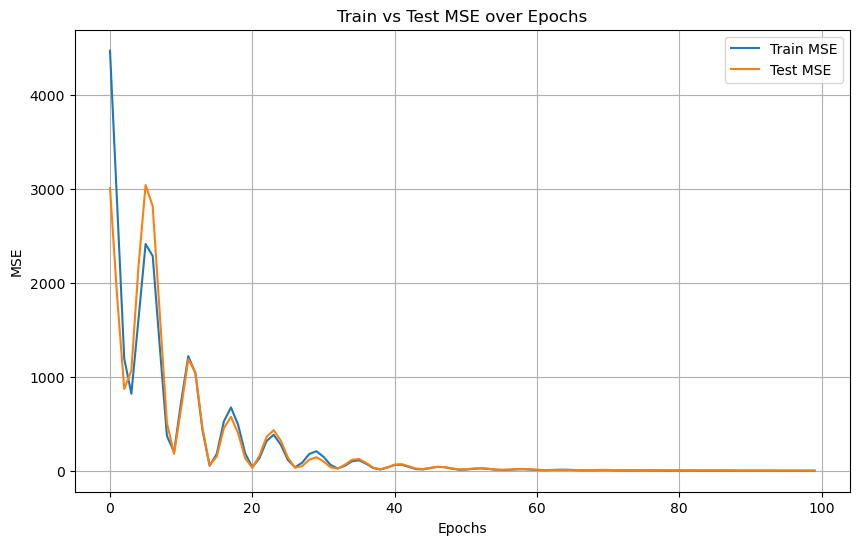

In [202]:
# پارامترهای اولیه
alpha = np.random.randn(6)  # مقادیر اولیه آلفا
teta = np.random.randn(3)   # مقادیر اولیه تتا
learning_rate = 0.001
momentum = 0.9

# متغیرهای مومنتوم برای آلفا و تتا
v_alpha = np.zeros_like(alpha)
v_teta = np.zeros_like(teta)

# تابع خطا (MSE)
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

train_errors = []
test_errors = []

# گرادیان نزولی همراه با مومنتوم برای آلفا و تتا
for epoch in range(100):  # ۱۰۰۰ اپوک برای آموزش
    y_pred_train = F(x_train, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], teta[0], teta[1], teta[2])
    error_train = mse(y_train, y_pred_train)
    
    # محاسبه خطا روی داده‌های آزمون
    y_pred_test = F(x_test, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], teta[0], teta[1], teta[2])
    error_test = mse(y_test, y_pred_test)

    # ذخیره خطاها
    train_errors.append(error_train)
    test_errors.append(error_test)
    
    # محاسبه گرادیان نسبت به پارامترهای آلفا
    grad_alpha = np.zeros_like(alpha)
    for i in range(len(alpha)):
        delta = np.zeros_like(alpha)
        delta[i] = 1e-5
        y_pred_delta = F(x_train, *(alpha + delta), teta[0], teta[1], teta[2])
        grad_alpha[i] = (mse(y_train, y_pred_delta) - error_train) / delta[i]
    
    # محاسبه گرادیان نسبت به پارامترهای تتا
    grad_teta = np.zeros_like(teta)
    for i in range(len(teta)):
        delta = np.zeros_like(teta)
        delta[i] = 1e-5
        y_pred_delta = F(x_train, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], *(teta + delta))
        grad_teta[i] = (mse(y_train, y_pred_delta) - error_train) / delta[i]
    
    # به‌روزرسانی پارامترهای آلفا با استفاده از مومنتوم
    v_alpha = momentum * v_alpha - learning_rate * grad_alpha
    alpha += v_alpha
    
    # به‌روزرسانی پارامترهای تتا با استفاده از مومنتوم
    v_teta = momentum * v_teta - learning_rate * grad_teta
    teta += v_teta

# رسم نمودار خطای train و test
plt.figure(figsize=(10, 6))
plt.plot(train_errors, label='Train MSE')
plt.plot(test_errors, label='Test MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Train vs Test MSE over Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [204]:
test_errors[-1]

4.149653376060305